In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

In [3]:
with open ("output.log") as f:
    data_lines = f.readlines()
epochs = [ int(line.split(" ")[1].strip()) for line in data_lines[0::2] ]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines[1::2] for word in data_line.split('\t') if word != '']
clean_data, epochs

([['iter', ' 345'],
  ['time per iter', ' 0.5507'],
  ['Epoch time', ' 190.01'],
  ['average_loss',
   ' [2.085343700188857, 2.2093635280686925, 2.1736017110621093, 2.178436775307555, 2.1490016013815785, 2.0329364489167285, 1.9099461396535238, 2.107678791279849, 2.100975146406724, 1.9779846309399118]'],
  ['average_reward',
   ' [0.1730845689197762, -0.8680258060183836, -0.6369073112141926, -0.3286085952551811, -0.4668185119084591, 0.10398925818202259, 0.5177918444781275, 0.18648023770549346, 0.28627914890162504, 0.30807381354257973]'],
  ['iter', ' 126'],
  ['time per iter', ' 0.4720'],
  ['Epoch time', ' 59.47'],
  ['average_loss',
   ' [2.7720776, 2.7312295, 2.678161, 2.6535008, 2.6941612, 2.6741707, 2.733896, 2.845314, 2.770526, 2.760854]'],
  ['average_reward',
   ' [1.9350872935679928, 3.295131855796361, 2.572681173007701, 2.307444780760835, 1.9816341341814343, 3.7401025665018834, 1.6983223601140063, 2.481385351075933, 2.497725912441334, 2.5049199529255137]'],
  ['iter', ' 109'],

In [4]:
for x in range(3):
    pass

In [5]:
num_ind = -1
loss_data_dict = []
for i in range(0,len(clean_data),5):
    if epochs[i//5] == 0 :
        loss_data_dict.append({key:[] for key in dict(clean_data).keys()})
        # robot_count = len(loss_data_dict[num_ind]['average_loss'])
        # epochs_range = len(loss_data_dict[num_ind]['iter'])
        # loss_data_dict[num_ind]['average_loss'] = np.array(loss_data_dict[num_ind]['average_loss'])
        # loss_data_dict[num_ind]['average_reward'] = np.array(loss_data_dict[num_ind]['average_reward'])
        num_ind += 1
    for j in range(5):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')
        eval_v = eval(v)            
        loss_data_dict[num_ind][k].append(eval_v)


In [6]:
N = len(loss_data_dict)
for i in range(N):
    loss_data_dict[i]['average_loss'] = np.array(loss_data_dict[i]['average_loss'])
    loss_data_dict[i]['average_reward'] = np.array(loss_data_dict[i]['average_reward'])
    loss_data_dict[i]['robot_count'] = loss_data_dict[i]['average_loss'].shape[1]
    loss_data_dict[i]['epoch_range'] = loss_data_dict[i]['average_loss'].shape[0]

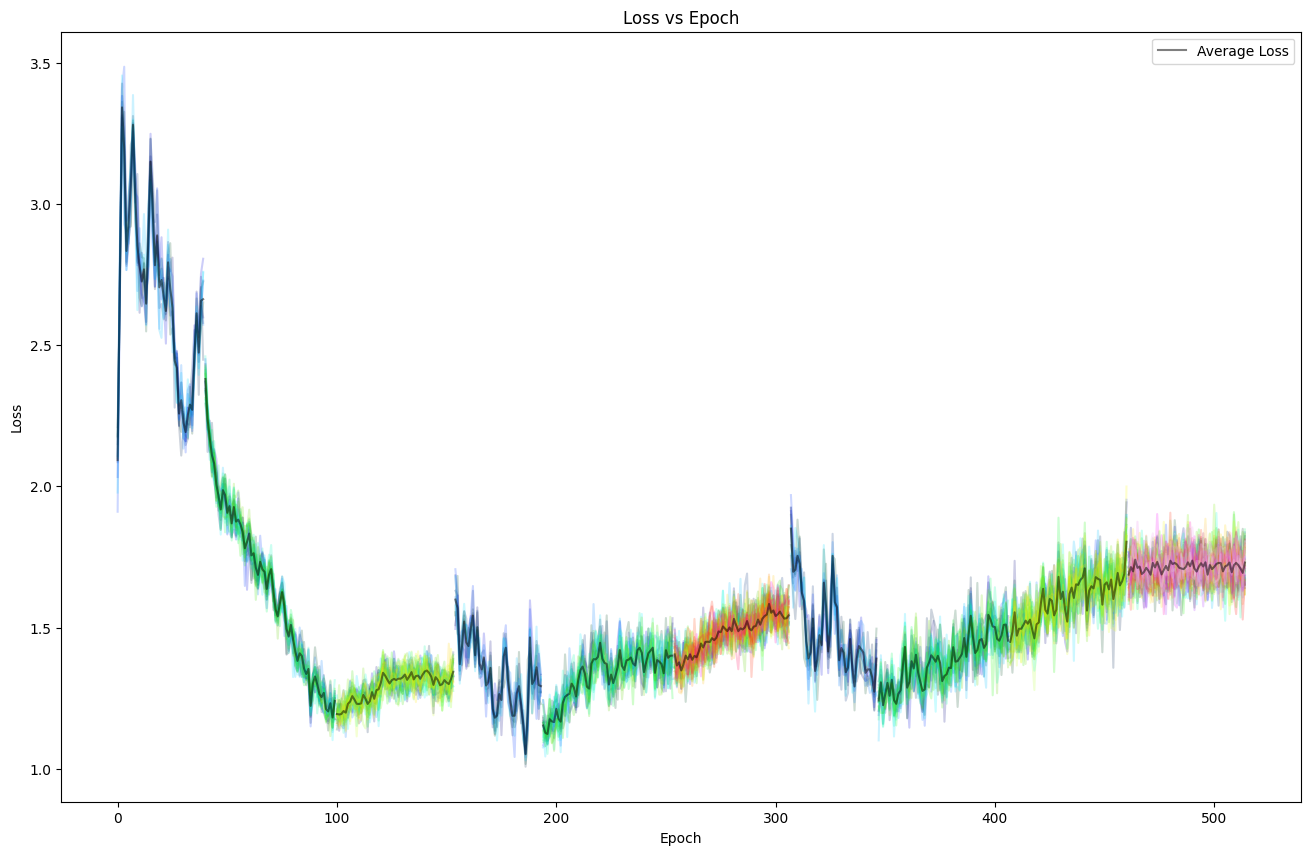

In [14]:
plt.figure(figsize=(16,10))

# Predefine consistent colors for each robot
num_robots = max(loss_data_dict[i]['robot_count'] for i in range(N))
colors = plt.cm.gist_ncar(np.linspace(0, 1, num_robots))

cum_sum_range = 0

for i in range(N):
    range_val = loss_data_dict[i]['epoch_range']
    range_start = cum_sum_range
    range_end = cum_sum_range + range_val
    cum_sum_range += range_val
    values = np.arange(range_start, range_end)

    for j in range(loss_data_dict[i]['robot_count']):
        plt.plot(values, loss_data_dict[i]['average_loss'][:, j], alpha=0.2, color=colors[j])

    # Plot average loss for this batch
    plt.plot(values, np.mean(loss_data_dict[i]['average_loss'], axis=1), alpha=0.5, color='black', label='Average Loss' if i == 0 else None)

plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss.png")
plt.show()


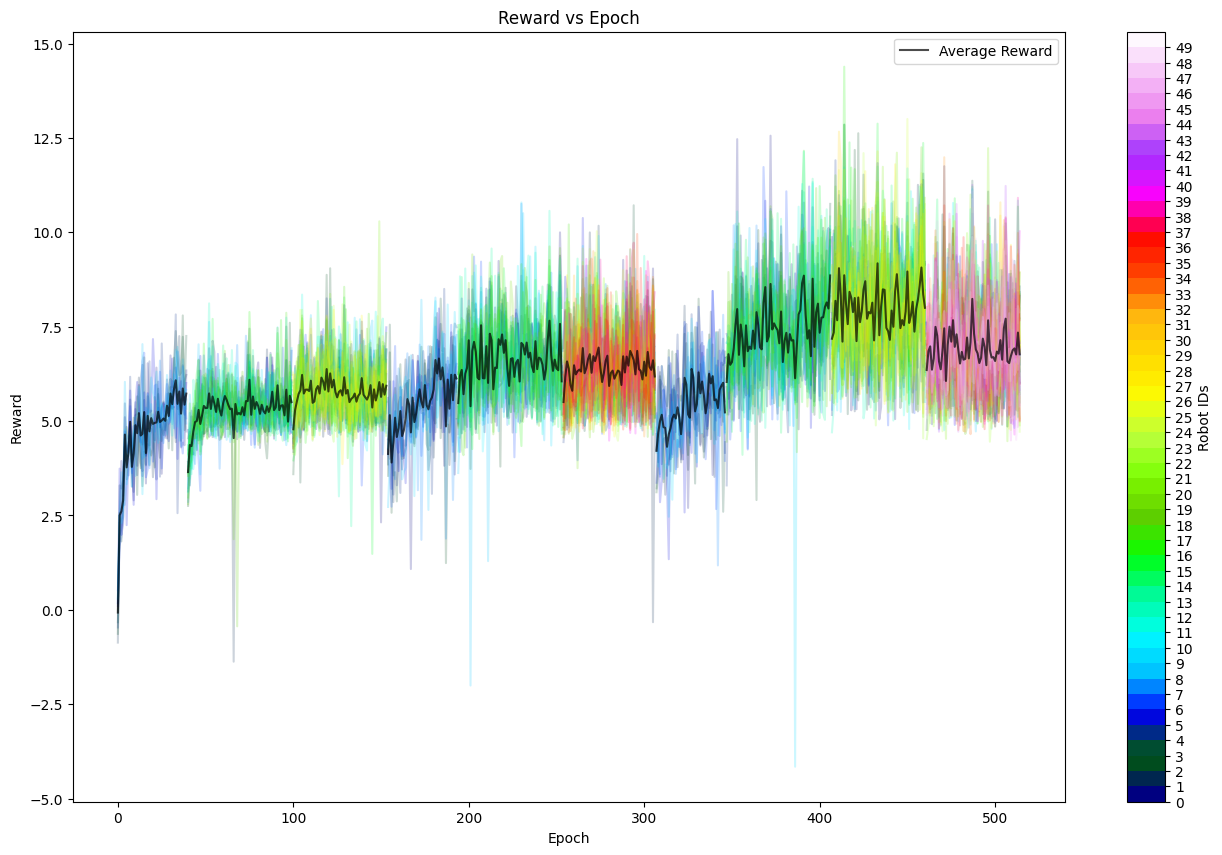

In [48]:
# plt.figure(figsize=(16,10))

# Predefine consistent colors for each robot
num_robots = max(loss_data_dict[i]['robot_count'] for i in range(N))
# colors = plt.cm.gist_ncar(np.linspace(0, 1, num_robots))
cmap = plt.get_cmap('gist_ncar', num_robots)
cum_sum_range = 0
fig, ax = plt.subplots(figsize=(16, 10))

for i in range(N):
    range_val = loss_data_dict[i]['epoch_range']
    range_start = cum_sum_range
    range_end = cum_sum_range + range_val
    cum_sum_range += range_val
    values = np.arange(range_start, range_end)

    for j in range(loss_data_dict[i]['robot_count']):
        ax.plot(values, loss_data_dict[i]['average_reward'][:, j], alpha=0.2, color=cmap(j))

    # Plot average loss for this batch
    plt.plot(values, np.mean(loss_data_dict[i]['average_reward'], axis=1), alpha=0.7, color='black', label='Average Reward' if i == 0 else None)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(0, num_robots))
plt.colorbar(sm, ax=ax, ticks=np.arange(num_robots), label="Robot IDs")

plt.title('Reward vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.legend()
plt.savefig("reward.png")
plt.show()


In [19]:
collision_df = pd.read_csv("evaluation.csv", index_col=0)
collision_df

,50,60,70,80,90,100
5,0.034500,0.061549,0.025556,0.040198,0.016189,0.000548
10,0.074673,0.045858,0.048489,0.033874,0.023235,0.029866
15,0.126212,0.075197,0.073310,0.053583,0.032262,0.028177
20,0.142546,0.101851,0.088432,0.044429,0.037837,0.038966
25,0.184065,0.165543,0.105120,0.090939,0.076456,0.051371
30,0.274675,0.173748,0.133291,0.097458,0.080379,0.064087


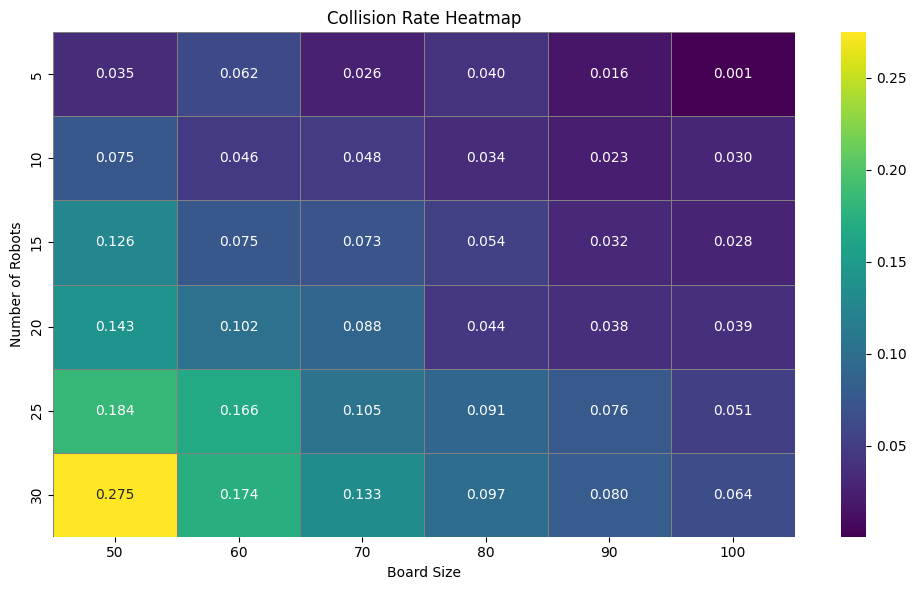

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(collision_df, annot=True, fmt=".3f", cmap="viridis", linewidths=0.5, linecolor="gray")
plt.title("Collision Rate Heatmap")
plt.xlabel("Board Size")
plt.ylabel("Number of Robots")
plt.tight_layout()
plt.show()

In [ ]:
normalized_collision_df = collision_df.copy()
robot_counts = normalized_collision_df.index
box_size = normalized_collision_df.columns
for robot_count in robot_counts:
    for bs in box_size:
        normalized_collision_df.loc[robot_count, bs] /= (int(robot_count) / int(bs**2))

NameError: name 'box_area' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(collision_df, annot=True, fmt=".3f", cmap="viridis", linewidths=0.5, linecolor="gray")
plt.title("Collision Rate Heatmap")
plt.xlabel("Board Size")
plt.ylabel("Number of Robots")
plt.tight_layout()
plt.show()